<h1>Exploratory Data Anaysis(EDA) on NYC Flights Data - 2013</h1>
*(Poovarasan)*
***
This is My First Notebook on EDA, kindly comment your feedback/suggestions for mistake and to imporve my skills. 
In this notebook,I have done basic EDA on 2013 NYC Flights data to gain insights from the data.
It consists of three section.
1. Data Cleaning and Preprocessing
2. Feature Engineering
3. Visualizing the data

In [1]:
#importing the required packages to perform the analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#code to print all statements in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The 2013 NYC flight dataset is in a csv file named "flight_data.csv". We use pandas *read_csv()* function to load the data from the csv file to dataframe.The character r' is used with filename to avoid using backlash(\) if the filename contains any escape sequenece character

In [3]:
Nyc_data = pd.read_csv(r'flight_data.csv')

Viewing the sample data

In [4]:
Nyc_data.sample(6)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
327593,2013,9,20,2028.0,1530,298.0,2217.0,1754,263.0,EV,5199,N758EV,LGA,CHS,80.0,641,15,30,20-09-2013 15:00
18249,2013,1,22,600.0,601,-1.0,910.0,918,-8.0,UA,1030,N17133,JFK,LAX,345.0,2475,6,1,22-01-2013 06:00
99364,2013,12,18,1434.0,1440,-6.0,1641.0,1644,-3.0,DL,1231,N914DE,LGA,DTW,88.0,502,14,40,18-12-2013 14:00
151930,2013,3,17,2110.0,2053,17.0,2222.0,2159,23.0,UA,1635,N78509,EWR,BOS,44.0,200,20,53,17-03-2013 20:00
87918,2013,12,5,NaN,1730,NaN,NaN,2050,NaN,AA,1185,N3HSAA,LGA,DFW,NaN,1389,17,30,05-12-2013 17:00
218381,2013,5,28,710.0,710,0.0,820.0,840,-20.0,WN,1171,N222WN,EWR,BNA,103.0,748,7,10,28-05-2013 07:00


Lets understand each column or feature or variable

- year, month and day - Date of departure
- dep_time,arr_time - Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time,sched_arr_time - Scheduled departure and arrival times (format HHMM or HMM),local tz.
- dep_delay,arr_delay - Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- hour,minute - Time of scheduled departure broken into hour and minutes.
- carrier - Two letter carrier abbreviation.
    9E: Endeavor Air Inc.<br>
    AA: American Airlines Inc.<br>
    AS: Alaska Airlines Inc.<br>
    B6: JetBlue Airways.<br>
    DL: Delta Air Lines Inc.<br>
    EV: ExpressJet Airlines Inc.<br>
    F9: Frontier Airlines Inc.<br>
    FL: AirTran Airways Corporation.<br>
    HA: Hawaiian Airlines Inc.<br>
    MQ: Envoy Air.<br>
    OO: SkyWest Airlines Inc.<br>
    UA: United Air Lines Inc.<br>
    US: US Airways Inc.<br>
    VX: Virgin America.<br>
    WN: Southwest Airlines Co.<br>
    YV: Mesa Airlines Inc.<br>
- tail_num - plane tail number.
- flight - flight number.
- origin and dest - airport origin and destination.
- air_time - Amount of time spent in the air, in minutes.
- distance Distance between airports, in miles.
- time_hour - Scheduled date and hour of the flight as a POSIXct date.


In [5]:
Nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


There are total 336776 rows in the datasets. Few columns such as dep_time, dep_delay, arr_time, arr_delay, tailnum, air_time has NaN values

In [6]:
Nyc_data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


From the above table we can infer below details.
1. Year column - contains only one year(2013).
2. we can also find the min,max values each columns.
3. Departure delay - In 2013, maximum departure delay is 1301 minutes and minimum departure delay is -43 minutes (which implies early departure) and average departure delay is 12.63 mins
4. Arrival delay - In 2013, maximum arrival delay is 1272 minutes and minimum arrival delay is -86 minutes (which implies early arrival) and average arrival delay is 6.89 mins
5. Air time - In 2013, maximum air time is 695 minutes and minimum air time is 20 minutes and average air time is 150.68 mins
6. distance - In 2013, maximum distance is 4983 miles and minimum distance is 17 miles and average distance is 1039 miles

<h3>1. Data Cleaning and Preprocessing</h3>

In [7]:
missing_df = Nyc_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(Nyc_data.shape[0]-missing_df['missing values'])/Nyc_data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,air_time,9430,97.199919
1,arr_delay,9430,97.199919
2,arr_time,8713,97.412820
3,dep_time,8255,97.548816
4,dep_delay,8255,97.548816
5,tailnum,2512,99.254104
6,year,0,100.000000
7,hour,0,100.000000
8,distance,0,100.000000
9,dest,0,100.000000


Almost 97% of data is available in all columns, you can choose to delete data with Na values or fill the Na values. Here I choose to fill Na's to familiarise myself with the data cleaning process

# Figure out why the data is missing
____
 
Data intution - by really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis.It can be a frustrating part of data science. 
For dealing with missing values,One of the most important question you can ask yourself to help figure this out is this:

> **Is this value missing becuase it wasn't recorded or becuase it dosen't exist?**

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation" and we'll learn how to do it next! :)


In [8]:
Nyc_data.carrier.unique()
print("no.of.carrier - ",len(Nyc_data.carrier.unique()))
Nyc_data.flight.unique()
print("no.of.flights - ",len(Nyc_data.flight.unique()))
Nyc_data.tailnum.unique()
print("no.of.tailnum - ",len(Nyc_data.tailnum.unique()))

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

no.of.carrier -  16


array([1545, 1714, 1141, ..., 3583, 3857, 3539], dtype=int64)

no.of.flights -  3844


array(['N14228', 'N24211', 'N619AA', ..., 'N776SK', 'N785SK', 'N557AS'],
      dtype=object)

no.of.tailnum -  4044


There are total 16 carrier which has 4044 flights for travelling

In [9]:
Nyc_data.origin.unique()
print("no.of.origin - ",len(Nyc_data.origin.unique()))
Nyc_data.dest.unique()
print("no.of.dest - ",len(Nyc_data.dest.unique()))

array(['EWR', 'LGA', 'JFK'], dtype=object)

no.of.origin -  3


array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

no.of.dest -  105


There are 3 Airports in New York from where flights are available to 105 destinations

Dropping all the row which has atleast one NaN value

In [10]:
#Dropping all the row which has atleast one NaN value
Nyc_drop_na = Nyc_data.dropna(how='any')

Choose to fill dep_delay and arr_delay with Mean grouped by carrier and origin/destination.
1. dep_delay - by grouping origin and carrier
2. arr_delay - by grouping dest and carrier

In [11]:
org_dep_delay=Nyc_drop_na.groupby(['origin','carrier'])['dep_delay'].mean()
org_arr_delay=Nyc_drop_na.groupby(['dest','carrier'])['arr_delay'].mean()

In [12]:
#Nyc_drop_na.info()
org_dep_delay.head(6)
org_arr_delay.head(6)

origin  carrier
EWR     9E          5.656329
        AA          9.985430
        AS          5.830748
        B6         13.009271
        DL         12.055879
        EV         20.049522
Name: dep_delay, dtype: float64

dest  carrier
ABQ   B6          4.381890
ACK   B6          4.852273
ALB   EV         14.397129
ANC   UA         -2.500000
ATL   9E          0.857143
      DL          7.424225
Name: arr_delay, dtype: float64

Creating a generalized method called "fillDelay" to fill Na values for departure and arrival delay columns

In [13]:
#Method to fill Na values
def fillDelay(df_na,df_value,col1,col2,updtCol):
    for index,row in df_value.iterrows():
        df_na.loc[(df_na[col1] == row.loc[col1]) & (df_na[col2] == row.loc[col2]),updtCol] = row.loc[updtCol]

In [14]:
#fetching data where dep_delay is Na
dep_na_data=Nyc_data[Nyc_data.dep_delay.isna()]
df_org_dep_del = org_dep_delay.to_frame()
#to convert pandas index in a dataframe to a column
df_org_dep_del.reset_index(level=1, inplace=True)
df_org_dep_del.reset_index(level=0, inplace=True)
#Calling fillDelay to fill dep_delay 
fillDelay(dep_na_data,df_org_dep_del,'origin','carrier','dep_delay')
Nycdata_na = Nyc_data.dropna(subset=['dep_delay'])
Nycdata_na = Nycdata_na.append(dep_na_data)

C:\Users\Poovarasan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
#fetching data where arr_delay is Na
arr_na_data=Nycdata_na[Nycdata_na.arr_delay.isna()]
df_org_arr_del = org_arr_delay.to_frame()
#to convert pandas index in a dataframe to a column
df_org_arr_del.reset_index(level=1, inplace=True)
df_org_arr_del.reset_index(level=0, inplace=True)
#Calling fillDelay to fill arr_delay 
fillDelay(arr_na_data,df_org_arr_del,'dest','carrier','arr_delay')
Nycdata_na = Nycdata_na.dropna(subset=['arr_delay'])
Nycdata_na = Nycdata_na.append(arr_na_data)
Nycdata_na = Nycdata_na.dropna(subset=['arr_delay'])

C:\Users\Poovarasan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
org_air_time=Nycdata_na.groupby(['origin','dest'])['air_time'].mean()
org_air_time.sample(5)

origin  dest
LGA     MCI     157.608451
        TYS      97.818868
        MDW     112.865979
        CAE     101.416667
JFK     CVG      95.972689
Name: air_time, dtype: float64

In [17]:
air_na_data=Nycdata_na[Nycdata_na.air_time.isna()]
df_org_air_tim = org_air_time.to_frame()
#to convert pandas index in a dataframe to a column
df_org_air_tim.reset_index(level=1, inplace=True)
df_org_air_tim.reset_index(level=0, inplace=True)
#to fill air_time
fillDelay(air_na_data,df_org_air_tim,'origin','dest','air_time')
Nycdata_na = Nycdata_na.dropna(subset=['air_time'])
Nycdata_na = Nycdata_na.append(air_na_data)

C:\Users\Poovarasan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
#Method to fill Na values
def fillTailNum(df_na,df_value,col1,updtCol):
    for index,row in df_value.iterrows():
        df_na.loc[(df_na[col1] == row.loc[col1]) ,updtCol] = row.loc[updtCol]

In [19]:
org_tailnum = Nyc_drop_na.groupby('carrier')['tailnum'].apply(lambda x: x.mode().iloc[0])

In [20]:
tailnum_na_data=Nycdata_na[Nycdata_na.tailnum.isna()]
df_org_tailnum = org_tailnum.to_frame()
#to convert pandas index in a dataframe to a column
df_org_tailnum.reset_index(level=0, inplace=True)
#to fill arr_delay
fillTailNum(tailnum_na_data,df_org_tailnum,'carrier','tailnum')
Nycdata_na = Nycdata_na.dropna(subset=['tailnum'])
Nycdata_na = Nycdata_na.append(tailnum_na_data)

C:\Users\Poovarasan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Dropping unwanted columns

In [21]:
Nycdata_na_drp = Nycdata_na.drop(['year','sched_dep_time','dep_time','sched_arr_time','arr_time','time_hour','flight','tailnum'], axis=1 )

In [22]:
Nycdata_na_drp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336774 entries, 0 to 336772
Data columns (total 11 columns):
month        336774 non-null int64
day          336774 non-null int64
dep_delay    336774 non-null float64
arr_delay    336774 non-null float64
carrier      336774 non-null object
origin       336774 non-null object
dest         336774 non-null object
air_time     336774 non-null float64
distance     336774 non-null int64
hour         336774 non-null int64
minute       336774 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 30.8+ MB


<h3>2.Feature Engineering:</h3>
1. creating new feature columns total_delay and delayed<br>
    Total delay  = departure delay + arrival delay <br>
    Delayed  = 1 if total delay < 0 and 0 otherwise
    

In [23]:
Nycdata_na_drp['total_delay'] = Nycdata_na_drp.dep_delay + Nycdata_na_drp.arr_delay
Nycdata_na_drp['delayed'] = Nycdata_na_drp.apply(lambda row: 1 if  row.total_delay < 0 else 0 , axis=1)

2. creating new feature columns date and weekday<br>
    date  = year-month-day combined <br>
    weekday  = day of the week for the given date

In [24]:
Nycdata_na_drp['date']='2013-'+Nycdata_na_drp.month.astype(str)+'-'+Nycdata_na_drp.day.astype(str)
Nycdata_na_drp['weekday'] = pd.to_datetime(Nycdata_na_drp["date"]).dt.day_name()
weekday_dict = {'Monday':1,'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
Nycdata_na_drp['weekday'] = Nycdata_na_drp['weekday'].apply(lambda x: weekday_dict.get(x))

In [25]:
season = {3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Fall'
          ,12:'Winter',1:'Winter',2:'Winter'}
season_dict = {'Spring':1,'Summer':2, 'Fall':3, 'Winter':4}
Nycdata_na_drp['season'] = Nycdata_na_drp['month'].apply(lambda x: season_dict.get(season.get(x)) if season.get(x) in season_dict else None)

In [26]:
Nycdata_na_drp.info()
Nycdata_na_drp.sample(7)
Nycdata_na_drp.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336774 entries, 0 to 336772
Data columns (total 16 columns):
month          336774 non-null int64
day            336774 non-null int64
dep_delay      336774 non-null float64
arr_delay      336774 non-null float64
carrier        336774 non-null object
origin         336774 non-null object
dest           336774 non-null object
air_time       336774 non-null float64
distance       336774 non-null int64
hour           336774 non-null int64
minute         336774 non-null int64
total_delay    336774 non-null float64
delayed        336774 non-null int64
date           336774 non-null object
weekday        336774 non-null int64
season         336774 non-null int64
dtypes: float64(4), int64(8), object(4)
memory usage: 43.7+ MB


,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,total_delay,delayed,date,weekday,season
42722,10,17,14.000000,16.00000,DL,EWR,ATL,116.000000,746,18,0,30.000000,0,2013-10-17,4,3
258123,7,9,-6.000000,-25.00000,US,EWR,PHX,259.000000,2133,13,59,-31.000000,1,2013-7-9,2,2
234965,6,14,19.000000,27.00000,WN,EWR,DEN,230.000000,1605,15,50,46.000000,0,2013-6-14,5,2
96917,12,15,20.049522,9.18863,EV,EWR,CMH,76.310496,463,12,29,29.238153,0,2013-12-15,7,4
292450,8,14,-1.000000,8.00000,UA,EWR,DEN,232.000000,1605,7,5,7.000000,0,2013-8-14,3,2
184974,4,22,-3.000000,10.00000,UA,LGA,IAH,206.000000,1416,6,30,7.000000,0,2013-4-22,1,1
237266,6,17,-8.000000,-6.00000,EV,EWR,MEM,139.000000,946,8,30,-14.000000,1,2013-6-17,1,2


,month,day,dep_delay,arr_delay,air_time,distance,hour,minute,total_delay,delayed,weekday,season
count,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000,336774.000000
mean,6.548498,15.710750,12.677876,6.965238,149.638920,1039.917606,13.180260,26.230062,19.643115,0.560037,3.892637,2.469009
std,3.414462,8.768611,39.724904,44.022594,93.340856,733.232205,4.661263,19.300789,81.843181,0.496383,1.984635,1.111380
min,1.000000,1.000000,-43.000000,-86.000000,20.000000,80.000000,5.000000,0.000000,-100.000000,0.000000,1.000000,1.000000
25%,4.000000,8.000000,-5.000000,-16.000000,82.000000,502.000000,9.000000,8.000000,-20.000000,0.000000,2.000000,1.000000
50%,7.000000,16.000000,-1.000000,-4.000000,128.000000,872.000000,13.000000,29.000000,-5.000000,1.000000,4.000000,2.000000
75%,10.000000,23.000000,12.000000,14.000000,190.000000,1389.000000,17.000000,44.000000,24.000000,1.000000,6.000000,3.000000
max,12.000000,31.000000,1301.000000,1272.000000,695.000000,4983.000000,23.000000,59.000000,2573.000000,1.000000,7.000000,4.000000


<h3>3. Visualizing the data</h3>
<h4>1.Univariate Analysis</h4>
In Univariate analysis, we plot the distribution of each features and finds the trend/pattern in it.

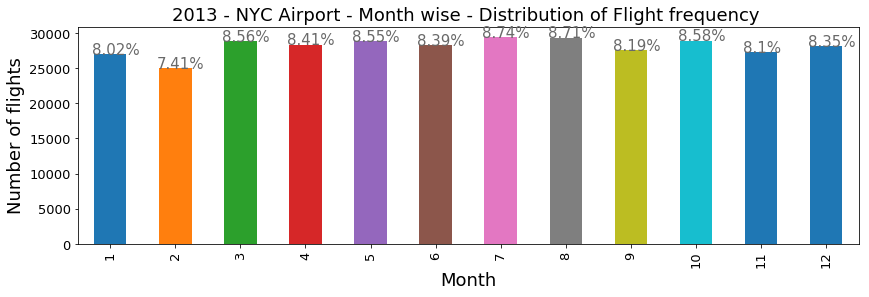

In [92]:
ax = Nycdata_na_drp['month'].value_counts().sort_index().plot(kind='bar', figsize=(14,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Month wise - Distribution of Flight frequency ", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Month", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')
plt.show();

We can observe from the plot that almost each month more than 25000 flights flies out from New york in 2013

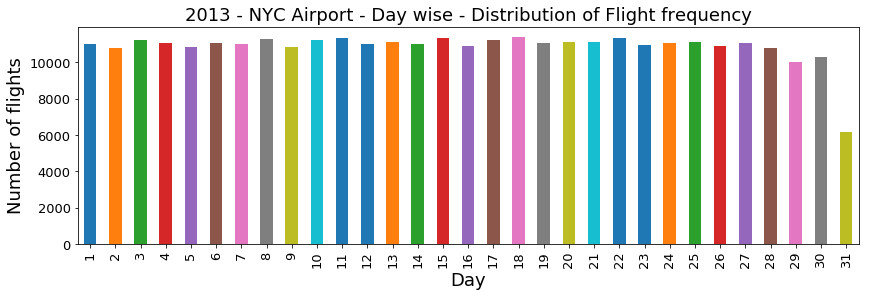

In [91]:
ax = Nycdata_na_drp['day'].value_counts().sort_index().plot(kind='bar', figsize=(14,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Day wise - Distribution of Flight frequency", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Day", fontsize=18);

plt.show();

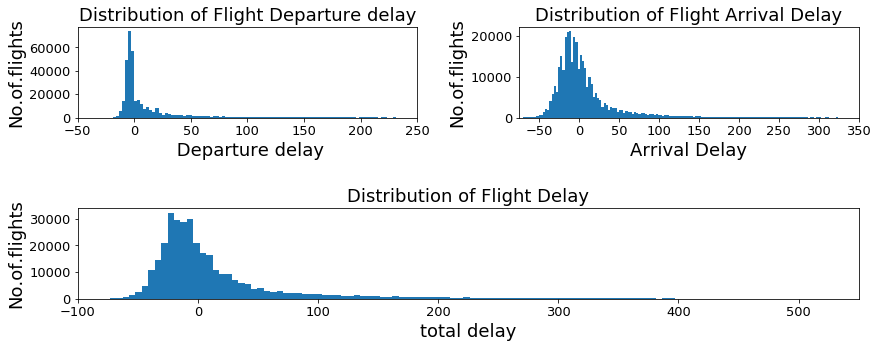

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplot(2,2,1)
ax = Nycdata_na_drp['dep_delay'].plot(kind='hist', figsize=(14,4),fontsize=13, bins=500);
ax.set_alpha(0.8)
ax.set_title("Distribution of Flight Departure delay", fontsize=18)
ax.set_ylabel("No.of.flights", fontsize=18);
ax.set_xlabel(" Departure delay", fontsize=18);
plt.xlim(-50,250)
plt.subplot(2,2,2)
ax2 = Nycdata_na_drp['arr_delay'].plot(kind='hist', figsize=(14,4),fontsize=13, bins=500);
ax2.set_alpha(0.8)
ax2.set_title("Distribution of Flight Arrival Delay", fontsize=18)
ax2.set_ylabel("No.of.flights", fontsize=18);
ax2.set_xlabel("Arrival Delay", fontsize=18);
plt.xlim(-75,350)
plt.subplot(2,1,2)
ax3 = Nycdata_na_drp['total_delay'].plot(kind='hist', figsize=(14,5),fontsize=13, bins=500);
ax3.set_alpha(0.8)
ax3.set_title("Distribution of Flight Delay", fontsize=18)
ax3.set_ylabel("No.of.flights", fontsize=18);
ax3.set_xlabel("total delay", fontsize=18);
plt.xlim(-100,550)
fig.subplots_adjust(hspace=1,  wspace=.3)
plt.show();

we can observe that most number of flights has departure delay < 25 minutes and arrival delay < 50 minutes and total delay < 50 minutes

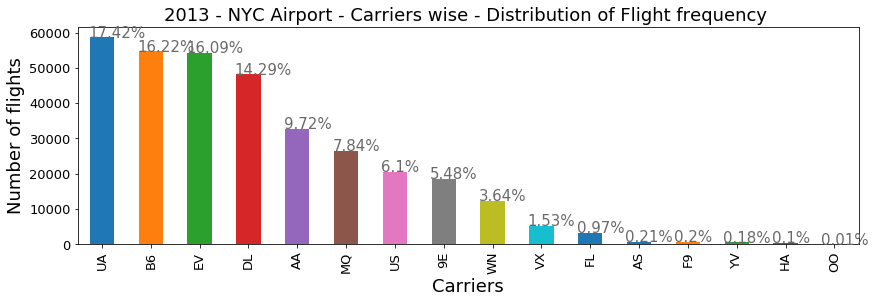

In [93]:
ax = Nycdata_na_drp['carrier'].value_counts().plot(kind='bar', figsize=(14,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Carriers wise - Distribution of Flight frequency ", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Carriers", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')
plt.show();

United Air Lines Inc(UA) has most number flight frequency in 2013

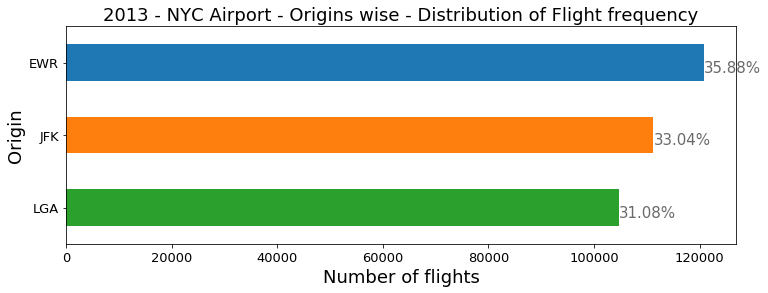

In [94]:
ax = Nycdata_na_drp['origin'].value_counts().plot(kind='barh', figsize=(12,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Origins wise - Distribution of Flight frequency", fontsize=18)
ax.set_xlabel("Number of flights", fontsize=18);
ax.set_ylabel("Origin", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()
plt.show();

Most number flights departed from EWR(Newark Liberty International Airport) in 2013

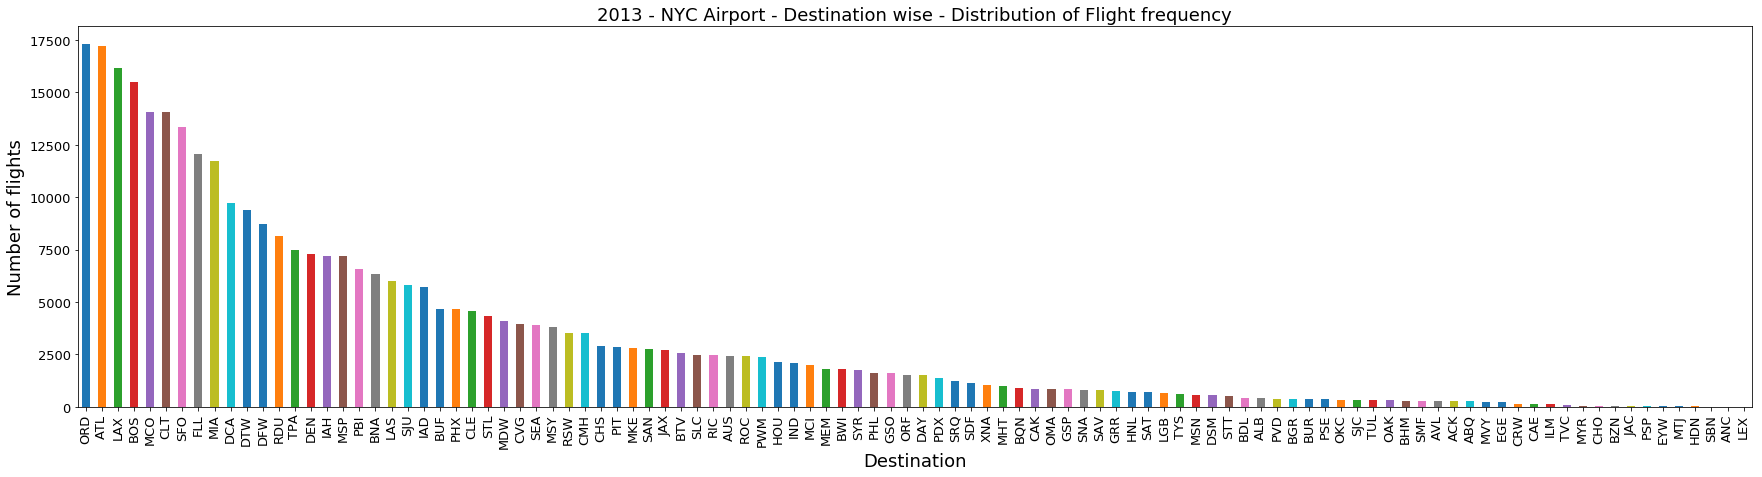

In [95]:
ax = Nycdata_na_drp['dest'].value_counts().plot(kind='bar', figsize=(30,7),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Destination wise - Distribution of Flight frequency", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Destination", fontsize=18);
plt.show();

Top three destinations:
 - ORD(O'Hare Airport, Chicago O'Hare, or simply O'Hare)
 - ATL(Hartsfield–Jackson Atlanta International Airport )
 - LAX(Los Angeles International Airport) are the top destination

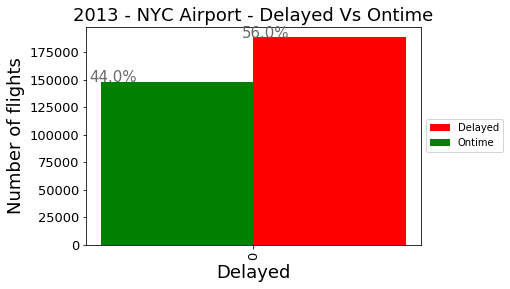

In [97]:
#my_colors = list(islice(cycle(['g', 'r']), None, len(Nycdata_na_drp)))
ax = Nycdata_na_drp[Nycdata_na_drp['delayed'] == 1]['delayed'].value_counts().plot(kind='bar' ,color = 'r'
                                                                  ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax2 = Nycdata_na_drp[Nycdata_na_drp['delayed'] == 0]['delayed'].value_counts().plot(kind='bar' ,color = 'g'
                                                                   ,label='Ontime' ,width=0.4 ,fontsize=13, position = 1);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Delayed Vs Ontime", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Delayed", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.autoscale()
plt.show();

56 % of the filghts are delayed in the year 2013

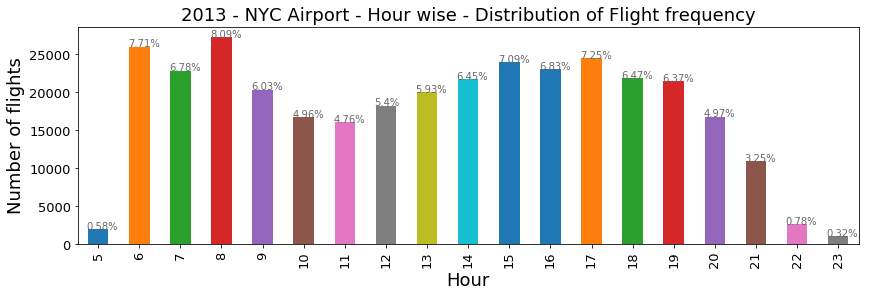

In [98]:
ax = Nycdata_na_drp['hour'].value_counts().sort_index().plot(kind='bar', figsize=(14,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Hour wise - Distribution of Flight frequency", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Hour", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,color='dimgrey')
plt.show();

There no flights available between 12 AM to 5 AM, More number of flights are available around 8 AM to fly out from New York 

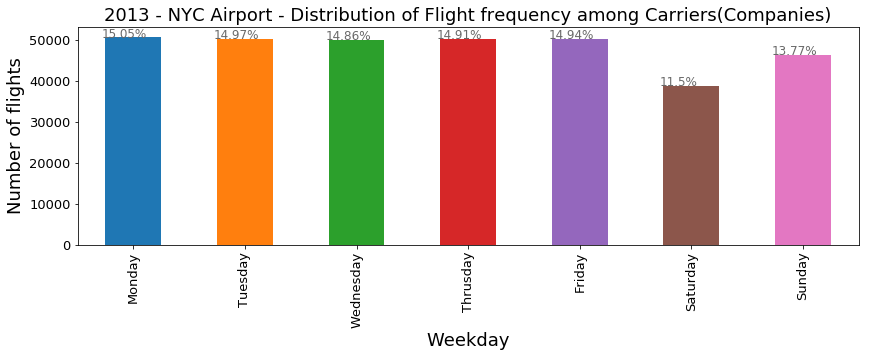

In [100]:
ax = Nycdata_na_drp['weekday'].value_counts().sort_index().plot(kind='bar', figsize=(14,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Distribution of Flight frequency among Carriers(Companies)", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Weekday", fontsize=18);
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'])
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='dimgrey')
plt.show();

Less number of flights available on saturday compared to other days

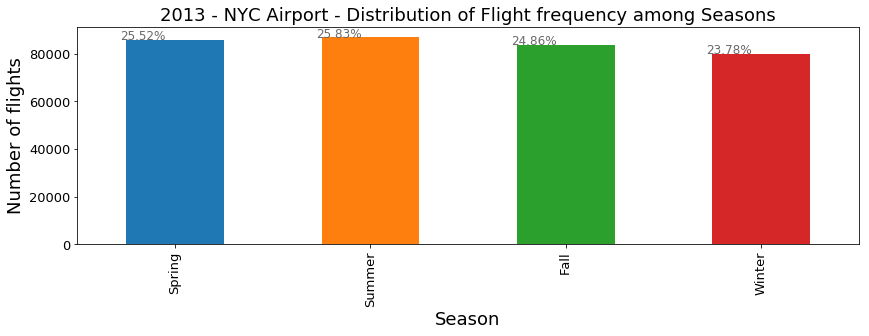

In [101]:
ax = Nycdata_na_drp['season'].value_counts().sort_index().plot(kind='bar', figsize=(14,4),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("2013 - NYC Airport - Distribution of Flight frequency among Seasons", fontsize=18)
ax.set_xticklabels(['Spring','Summer','Fall','Winter'])
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Season", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='dimgrey')
    
plt.show();

Less number of flights frequency during Winter , which is excepted

<h4>2. Multivariate Analysis</h4>

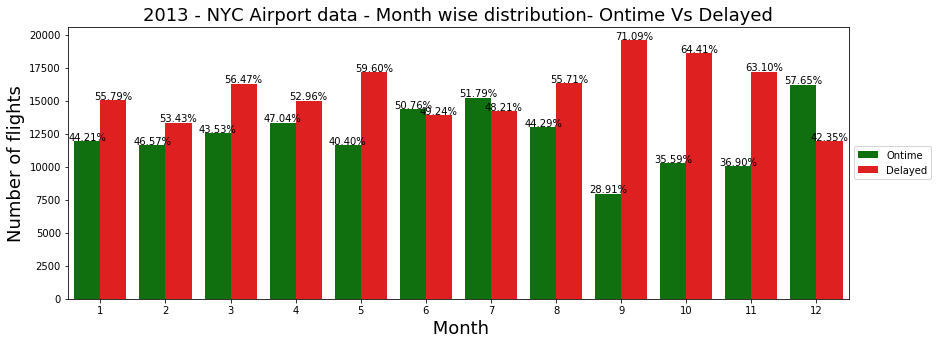

In [103]:
ax = sns.countplot("month", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"])
plt.title('2013 - NYC Airport data - Month wise distribution- Ontime Vs Delayed', fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel(" Month", fontsize=18);

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.2%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.2%}'.format(height_r/total), ha="center")
    
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
fig = plt.gcf()
fig.set_size_inches( 14,5)
plt.show();

- September , October and November are the wosrt months to fly out from New York , since the percentage delay is more than 63 % during those months.
- June, July and Decemeber are the best months to fly from New York

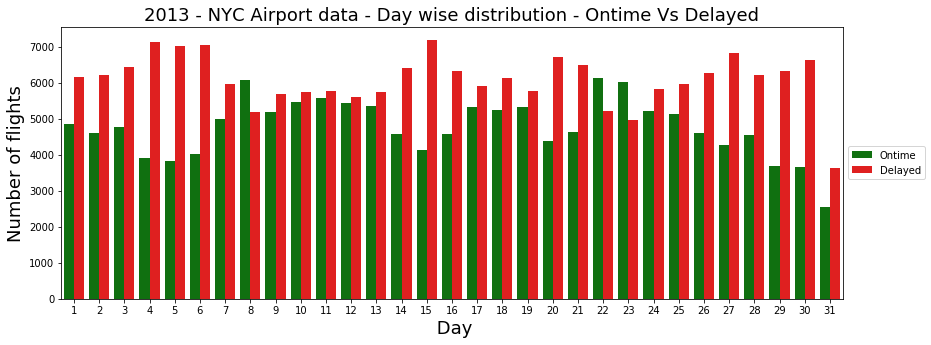

In [104]:
ax = sns.countplot("day", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"])
plt.title('2013 - NYC Airport data - Day wise distribution - Ontime Vs Delayed', fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel(" Day", fontsize=18);
  
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
fig = plt.gcf()
fig.set_size_inches( 14,5)
plt.show();

8th, 22nd and 23rd day has more ontime departure than delay, so be sure to book ticket on these days if you want to avoid departure delay

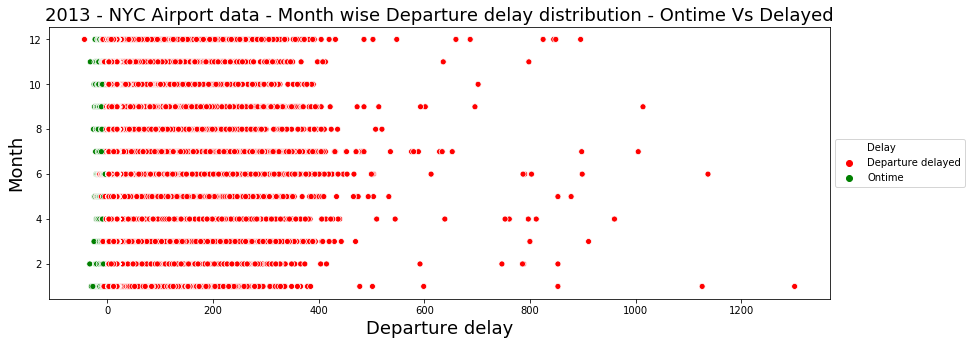

In [111]:
# Use the 'hue' argument to provide a factor variable
ax = sns.scatterplot( x="dep_delay", y="month", data=Nycdata_na_drp,  hue='delayed', palette=["r", "g"])
#ax = sns.violinplot(x="month", y="dep_delay", data=Nycdata_na_drp, hue='delayed')
plt.title('2013 - NYC Airport data - Month wise Departure delay distribution - Ontime Vs Delayed', fontsize=18)
ax.set_ylabel("Month", fontsize=18);
ax.set_xlabel("Departure delay", fontsize=18);
    
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Delay')
L.get_texts()[1].set_text('Departure delayed')
L.get_texts()[2].set_text('Ontime')
fig = plt.gcf()
fig.set_size_inches( 14,5)
plt.show();

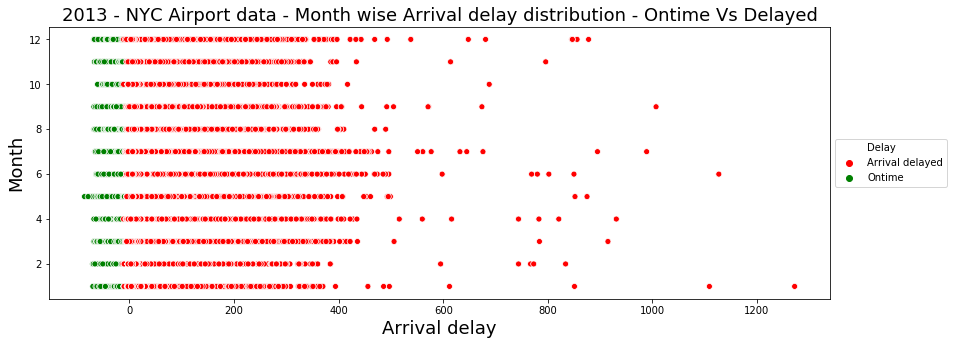

In [112]:
# Use the 'hue' argument to provide a factor variable
ax = sns.scatterplot( x="arr_delay", y="month", data=Nycdata_na_drp,  hue='delayed', palette=["r", "g"])
#ax = sns.violinplot(x="month", y="dep_delay", data=Nycdata_na_drp, hue='delayed')
plt.title('2013 - NYC Airport data - Month wise Arrival delay distribution - Ontime Vs Delayed', fontsize=18)
ax.set_ylabel("Month", fontsize=18);
ax.set_xlabel("Arrival delay", fontsize=18);
    
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Delay')
L.get_texts()[1].set_text('Arrival delayed')
L.get_texts()[2].set_text('Ontime')
fig = plt.gcf()
fig.set_size_inches( 14,5)
plt.show();

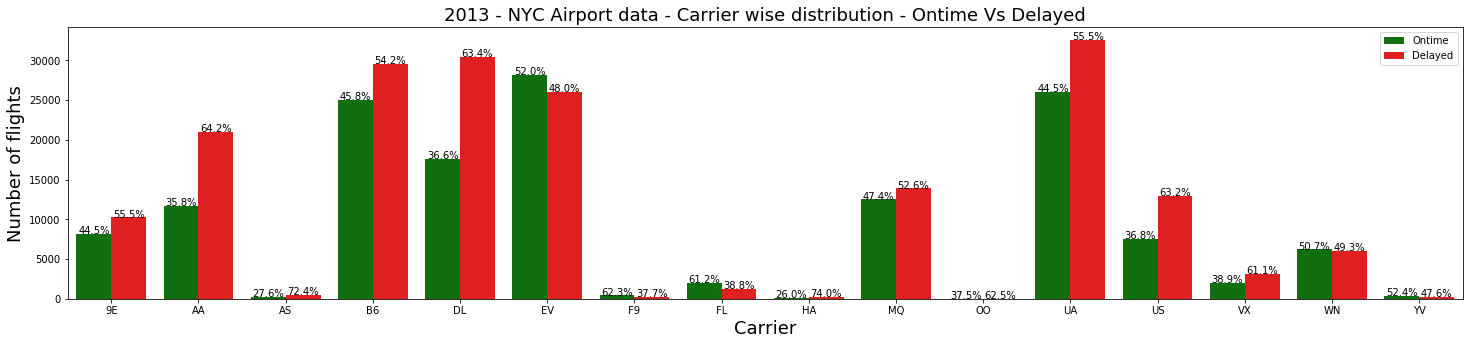

In [113]:
order_list = sorted(Nycdata_na_drp.carrier.unique())
ax = sns.countplot("carrier", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"], order=order_list)
plt.title('2013 - NYC Airport data - Carrier wise distribution - Ontime Vs Delayed', fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Carrier", fontsize=18);

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
import math
for left, right in zip(left_bars, right_bars):
    height_l = 0 if math.isnan(left.get_height()) else left.get_height()
    height_r = 0 if math.isnan(right.get_height()) else right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l, '{0:.1%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r, '{0:.1%}'.format(height_r/total), ha="center")
    
L=plt.legend(loc='best')
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
fig = plt.gcf()
fig.set_size_inches( 25,5)
plt.show();

- Best carrier to travel are <b>EV,F9,FL,WN,YV</b> as they have more ontime departure
- Most Worst carrier to travel are <b>AA,DL</b> as they have more delayed departure

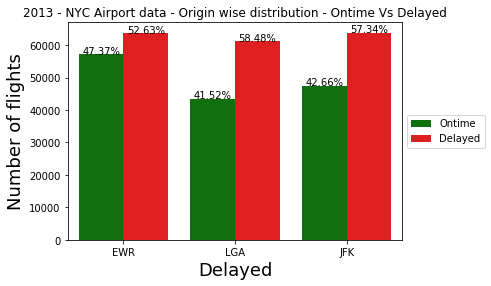

In [118]:
ax = sns.countplot("origin", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"])
plt.title('2013 - NYC Airport data - Origin wise distribution - Ontime Vs Delayed')
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Delayed", fontsize=18);

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.2%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.2%}'.format(height_r/total), ha="center")
    
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
plt.show();

LGA has more delayed flights than other origin

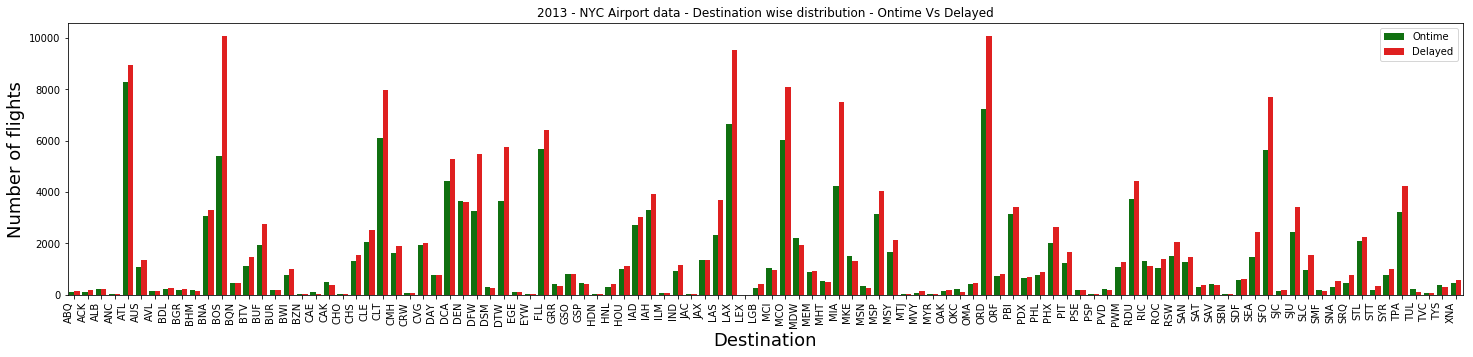

In [117]:
order_list = sorted(Nycdata_na_drp.dest.unique())
ax = sns.countplot("dest", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"], order=order_list)
plt.title('2013 - NYC Airport data - Destination wise distribution - Ontime Vs Delayed')
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Destination", fontsize=18);

L=plt.legend(loc='best')
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
fig = plt.gcf()
fig.set_size_inches( 25,5)
plt.show();

Flights to <b>BOS,LAX,ORD</b> has departure delay

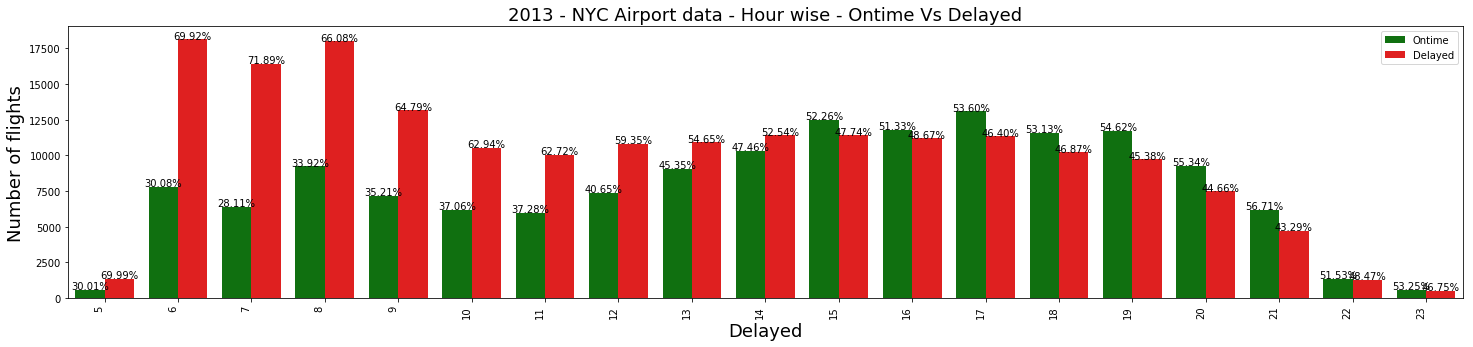

In [119]:
order_list = sorted(Nycdata_na_drp.hour.unique())
ax = sns.countplot("hour", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"], order=order_list)
plt.title('2013 - NYC Airport data - Hour wise - Ontime Vs Delayed', fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Delayed", fontsize=18);

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.2%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.2%}'.format(height_r/total), ha="center")
    
L=plt.legend(loc='best')
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
fig = plt.gcf()
fig.set_size_inches( 25,5)
plt.show();

flights during the ealry hours of the day are mostly delayed and the trend changes during the later hours

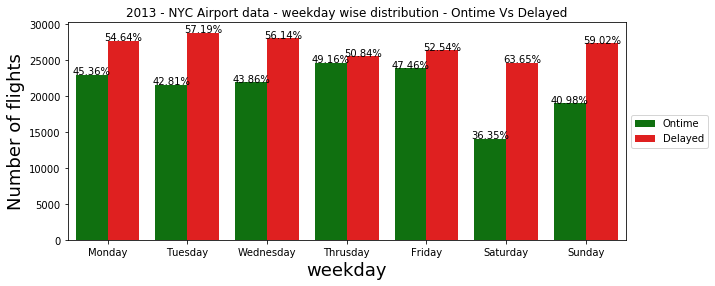

In [120]:
ax = sns.countplot("weekday", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"])
plt.title('2013 - NYC Airport data - weekday wise distribution - Ontime Vs Delayed')
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("weekday", fontsize=18);
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.2%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.2%}'.format(height_r/total), ha="center")
    
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
fig = plt.gcf()
fig.set_size_inches( 10,4)
plt.show();

Saturday has the worst ontime to delayed ratio

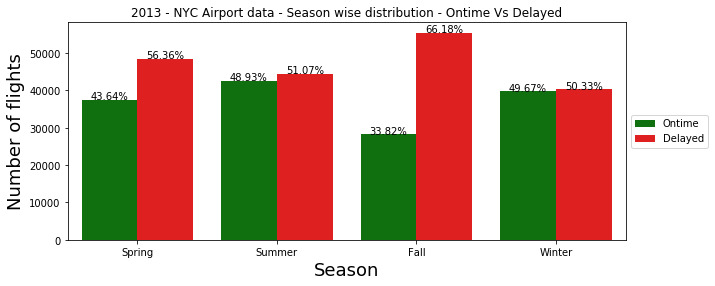

In [122]:
ax = sns.countplot("season", data=Nycdata_na_drp, hue='delayed' , palette=["g", "r"])
plt.title('2013 - NYC Airport data - Season wise distribution - Ontime Vs Delayed')
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("Season", fontsize=18);
ax.set_xticklabels(['Spring','Summer','Fall','Winter'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.2%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.2%}'.format(height_r/total), ha="center")
    
L=plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
L.get_texts()[0].set_text('Ontime')
L.get_texts()[1].set_text('Delayed')
fig = plt.gcf()
fig.set_size_inches( 10,4)
plt.show();

Fall season has more delayed flight than Winter which is unexcepted

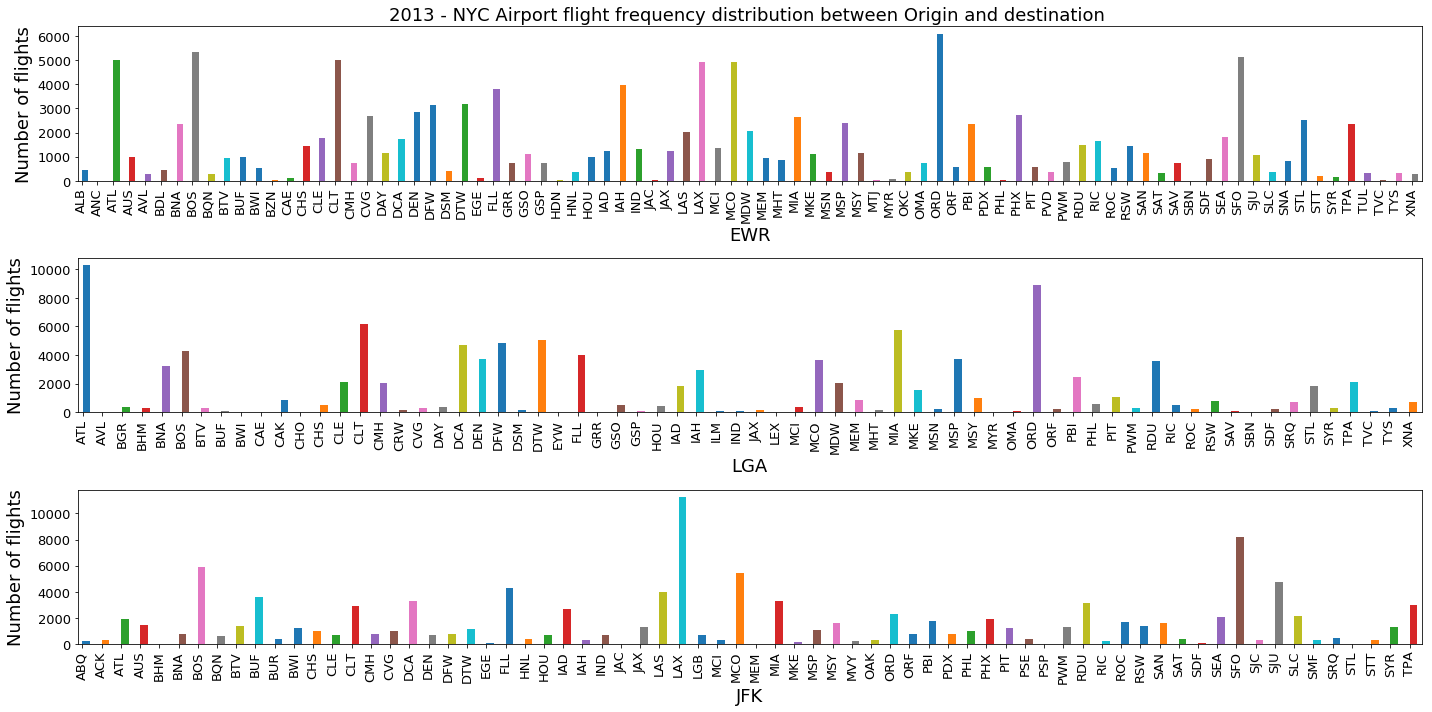

In [123]:
fig, axes = plt.subplots(nrows=3)
#my_colors = list(islice(cycle(['g', 'r']), None, len(Nycdata_na_drp)))
ax= Nycdata_na_drp[Nycdata_na_drp['origin'] == 'EWR'].groupby(['dest']).size().plot(kind='bar' ,ax=axes[0]
                                                    ,figsize=(25,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax2 = Nycdata_na_drp[Nycdata_na_drp['origin'] == 'LGA'].groupby(['dest']).size().plot(kind='bar' ,ax=axes[1]
                                                    ,figsize=(20,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax3 = Nycdata_na_drp[Nycdata_na_drp['origin'] == 'JFK'].groupby(['dest']).size().plot(kind='bar' ,ax=axes[2]
                                                    ,figsize=(20,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax.set_title("2013 - NYC Airport flight frequency distribution between Origin and destination ", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("EWR", fontsize=18)
ax2.set_xlabel("LGA", fontsize=18)
ax2.set_ylabel("Number of flights", fontsize=18);
ax3.set_xlabel("JFK", fontsize=18)
ax3.set_ylabel("Number of flights", fontsize=18);
fig.tight_layout()
plt.show();

- More number of flights availble to <b>ORD,ATL from EWR and LGA</b>, so if you want to catch ORD flight book from these airport.
- Simlarly more number of flights availble to <b>LAX from JFK and LGA</b>, so if you want to catch ORD flight book from these airport.
- Flights to ABQ is only available from JFK.
- Similary flights to ALB is only available from EWR.

In [127]:
#To view wchich route has maximum frequency
groupby_df = Nycdata_na_drp.groupby(['origin','dest']).size().reset_index(name ='Total')
print("Top destination from each origin and its total flight frequency in 2013:")
groupby_df[groupby_df['Total'].isin(groupby_df.groupby('origin').max()['Total'].values)]

Top destination from each origin and its total flight frequency in 2013:


,origin,dest,Total
54,EWR,ORD,6100
116,JFK,LAX,11262
155,LGA,ATL,10263


In [ ]:
#Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'EWR') & (Nycdata_na_drp['delayed'] == 1)].groupby(['dest']).size()

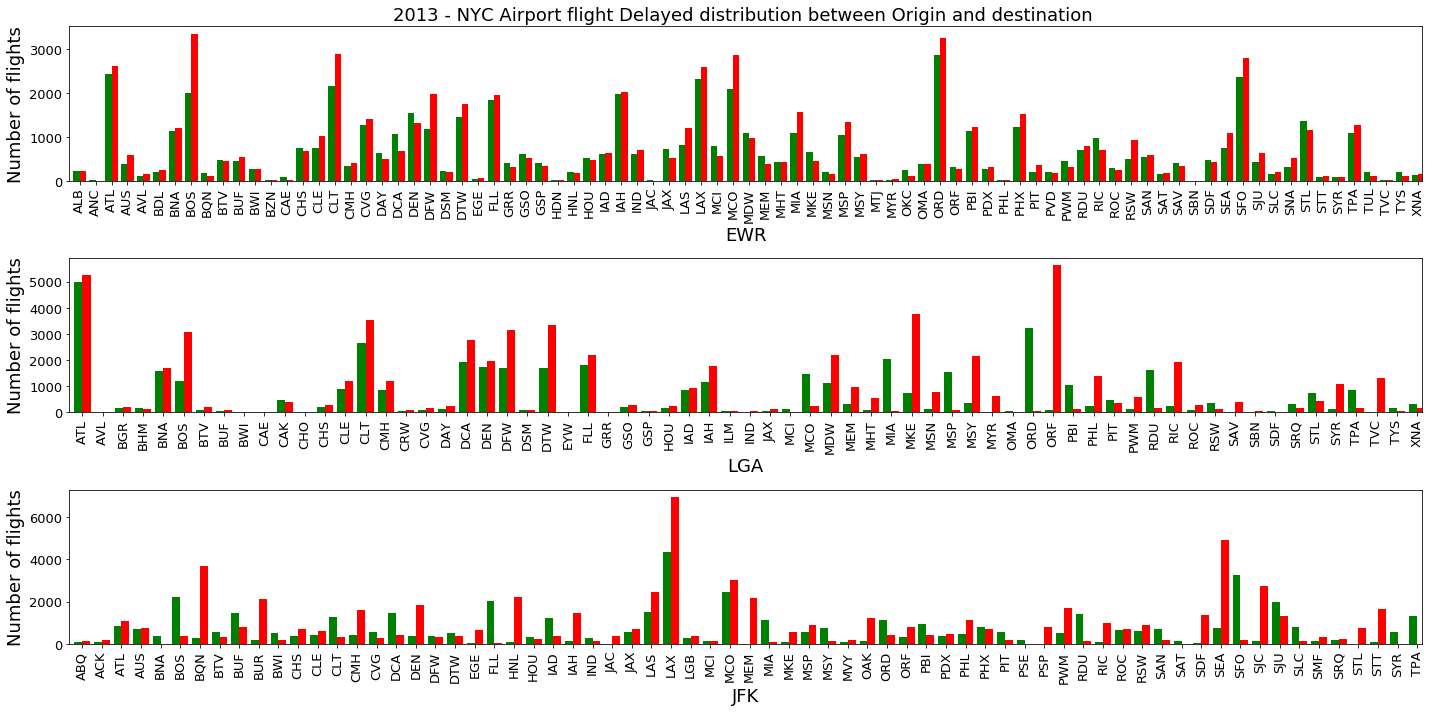

In [129]:
fig, axes = plt.subplots(nrows=3)
#my_colors = list(islice(cycle(['g', 'r']), None, len(Nycdata_na_drp)))
ax= Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'EWR' ) & ( Nycdata_na_drp['delayed'] == 1)].groupby(['dest']).size().plot(kind='bar' ,ax=axes[0]
                                            ,color='r',figsize=(25,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax1= Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'EWR' ) & ( Nycdata_na_drp['delayed'] == 0)].groupby(['dest']).size().plot(kind='bar' ,ax=axes[0]
                                            ,color='g',figsize=(25,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 1);
ax2 = Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'LGA') & ( Nycdata_na_drp['delayed'] == 1)].groupby(['dest']).size().plot(kind='bar' ,ax=axes[1]
                                            ,color='r',figsize=(20,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax21 = Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'LGA') & ( Nycdata_na_drp['delayed'] == 0)].groupby(['dest']).size().plot(kind='bar' ,ax=axes[1]
                                            ,color='g',figsize=(20,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 1);
ax3 = Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'JFK') & ( Nycdata_na_drp['delayed'] == 1)].groupby(['dest']).size().plot(kind='bar' ,ax=axes[2]
                                            ,color='r',figsize=(20,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 0);
ax31 = Nycdata_na_drp[(Nycdata_na_drp['origin'] == 'JFK') & (Nycdata_na_drp['delayed'] == 0)].groupby(['dest']).size().plot(kind='bar' ,ax=axes[2]
                                            ,color='g',figsize=(20,10) ,label='Delayed' ,width=0.4 ,fontsize=13, position = 1);
ax.set_title("2013 - NYC Airport flight Delayed distribution between Origin and destination ", fontsize=18)
ax.set_ylabel("Number of flights", fontsize=18);
ax.set_xlabel("EWR", fontsize=18)
ax2.set_xlabel("LGA", fontsize=18)
ax2.set_ylabel("Number of flights", fontsize=18);
ax3.set_xlabel("JFK", fontsize=18)
ax3.set_ylabel("Number of flights", fontsize=18);
fig.tight_layout()
plt.show();

Flight from <b>LGA to ORD </b> has more ontime departure than flight from <b>EWR to ORD</b>.

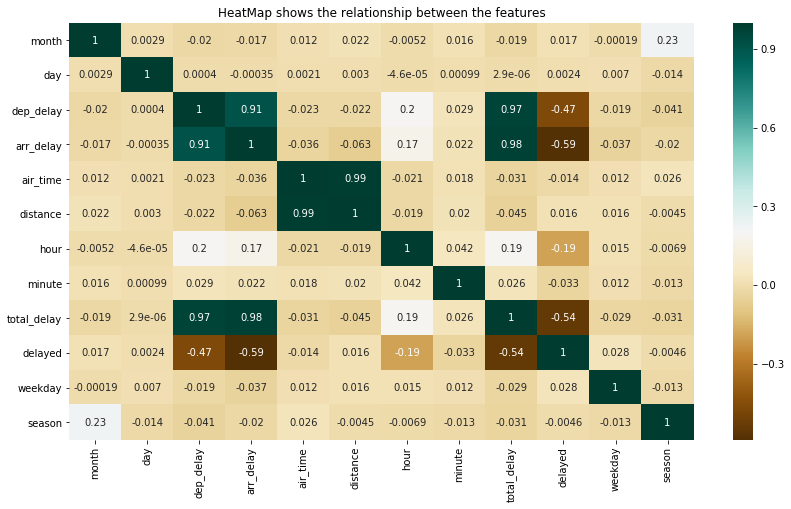

In [130]:
fig, ax = plt.subplots(figsize=(12,7))  
sns.heatmap(Nycdata_na_drp.corr(),cmap="BrBG",annot=True, ax=ax)
fig.tight_layout()
plt.title("HeatMap shows the relationship between the features")
plt.show();